In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

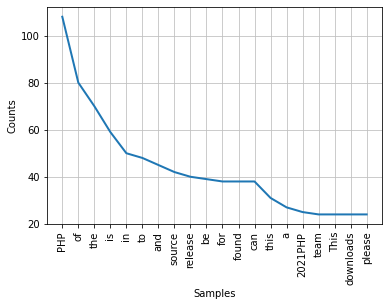

In [5]:
from bs4 import BeautifulSoup

import urllib.request

import nltk

from nltk.corpus import stopwords

response = urllib.request.urlopen('http://php.net/')

html = response.read()

soup = BeautifulSoup(html,"html5lib")

text = soup.get_text(strip=True)

tokens = [t for t in text.split()]
freq = nltk.FreqDist(tokens)

freq.plot(20, cumulative=False)

In [ ]:
clean_tokens = tokens[:]

sr = stopwords.words('english')

for token in tokens:

    if token in stopwords.words('english'):

        clean_tokens.remove(token)

freq = nltk.FreqDist(clean_tokens)

for key,val in freq.items():

    print (str(key) + ':' + str(val))


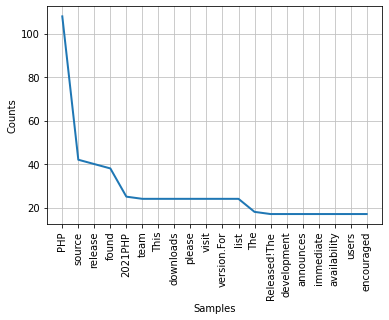

In [7]:
freq.plot(20, cumulative=False)

# Coding Exercise

### with stopwords

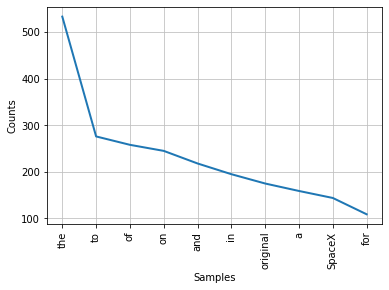

In [12]:
# https://en.wikipedia.org/wiki/SpaceX

# get html
response = urllib.request.urlopen('https://en.wikipedia.org/wiki/SpaceX')

html = response.read()

soup = BeautifulSoup(html,"html5lib")

# get text
text = soup.get_text(strip=True)

# get tokens
tokens = [t for t in text.split()]
# create distribution of top 10
freq = nltk.FreqDist(tokens)

freq.plot(10, cumulative=False)

### without stopwords

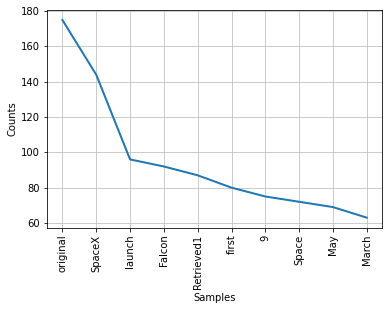

In [19]:
clean_tokens = tokens[:]

sr = stopwords.words('english')

# strip stop words

for token in tokens:

    if token in stopwords.words('english'):

        clean_tokens.remove(token)

# do another distribution
freq = nltk.FreqDist(clean_tokens)

freq.plot(10, cumulative=False)

In [20]:
# get list of top 10 tokens
values = list(freq.items())
values = sorted(values, key=lambda x: x[1], reverse=True)[:10]
print(values)


[('original', 175), ('SpaceX', 144), ('launch', 96), ('Falcon', 92), ('Retrieved1', 87), ('first', 80), ('9', 75), ('Space', 72), ('May', 69), ('March', 63)]


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Text major ticklabel objects>)

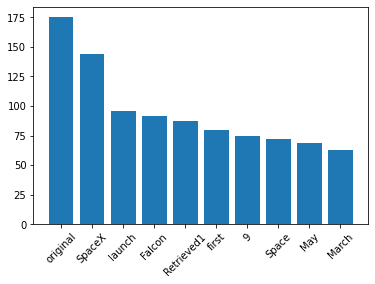

In [22]:
import matplotlib.pyplot as plt

# create values for bar chart
x = range(1, len(values) + 1)
labels = [tup[0] for tup in values]
y = [tup[1] for tup in values]

# plot and rotate ticks
plt.bar(x, y, tick_label=labels)
plt.xticks(rotation=45)
